# Tesla/Nasdaq USD Prediction with Artificial Intelligence RNN Neural Network - Emirhan BULUT

Tesla/Nasdaq USD Prediction with Artificial Intelligence RNN Neural Network
I developed Tesla/Nasdaq USD Prediction with RNN Neural Network software with Artificial Intelligence. I predicted the fall on April 8, 2022 with 97.04% accuracy in the TESLA/USD pair. '0.0325847058254806' MAE Score, '0.001749750789686177' MSE Score, 97.04% Accuracy Question software has been completed.

The ETH/USDT pair forecast for April 8, 2022 was correctly forecasted based on data from Nasdaq.

Software codes and information are shared with you as open source code free of charge on GitHub and My Personal Web Address.

Happy learning!

Emirhan BULUT

Senior Artificial Intelligence Engineer and Inventor


###**The coding language used:**

`Python 3.9.8`

###**Libraries Used:**

`Tensorflow - Keras`

`NumPy`

`Matplotlib`

`Pandas`

`Scikit-learn (SKLEARN)`

<img class="fit-picture"
     src="https://github.com/emirhanai/Tesla-Nasdaq-USD-Prediction-with-Artificial-Intelligence-RNN-Neural-Network/blob/main/Tesla-Nasdaq%20USD%20Prediction%20with%20Artificial%20Intelligence%20RNN%20Neural%20Network.png?raw=true"
     alt="Tesla/Nasdaq USD Prediction with Artificial Intelligence RNN Neural Network- Emirhan BULUT">
     
### **Developer Information:**

Name-Surname: **Emirhan BULUT**

Contact (Email) : **emirhan@isap.solutions**

LinkedIn : **[https://www.linkedin.com/in/artificialintelligencebulut/][LinkedinAccount]**

[LinkedinAccount]: https://www.linkedin.com/in/artificialintelligencebulut/

Kaggle: **[https://www.kaggle.com/emirhanai][Kaggle]**

Official Website: **[https://www.emirhanbulut.com.tr][OfficialWebSite]**

[Kaggle]: https://www.kaggle.com/emirhanai

[OfficialWebSite]: https://www.emirhanbulut.com.tr




```Prediction: 
-0.04899706 equeals of 2608.594277 USDT
Real ETH Value (for 2/24/2022) is 2562.79248 
Test Accuracy is %98.21```



In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

In [154]:
data = pd.read_csv("/content/Tesla_Nasdaq_Prediction.csv")
data = data.iloc[:,0:6]
y = data.loc[:,['Close/Last','Date']]
y = data.iloc[:,0:2]
data = data.drop(['Close/Last'],axis='columns')
print(data.head(5))
print(y.head(5))

       Date    Volume     Open     High      Low
0  4/8/2022  18337900  1043.21  1048.44  1022.44
1  4/7/2022  26482350  1052.39  1076.59  1021.54
2  4/6/2022  29782850  1073.47  1079.00  1027.70
3  4/5/2022  26691670  1136.30  1152.87  1087.30
4  4/4/2022  27392570  1089.38  1149.91  1072.53
       Date  Close/Last
0  4/8/2022     1025.49
1  4/7/2022     1057.26
2  4/6/2022     1045.76
3  4/5/2022     1091.26
4  4/4/2022     1145.45


In [155]:
y = y.set_index('Date')
y.index = pd.to_datetime(y.index,unit='ns')
print(y.index)

DatetimeIndex(['2022-04-08', '2022-04-07', '2022-04-06', '2022-04-05',
               '2022-04-04', '2022-04-01', '2022-03-31', '2022-03-30',
               '2022-03-29', '2022-03-28',
               ...
               '2012-04-24', '2012-04-23', '2012-04-20', '2012-04-19',
               '2012-04-18', '2012-04-17', '2012-04-16', '2012-04-13',
               '2012-04-12', '2012-04-11'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)


In [156]:
data = data.set_index('Date')
data.index = pd.to_datetime(data.index,unit='ns')
print(data.index)

DatetimeIndex(['2022-04-08', '2022-04-07', '2022-04-06', '2022-04-05',
               '2022-04-04', '2022-04-01', '2022-03-31', '2022-03-30',
               '2022-03-29', '2022-03-28',
               ...
               '2012-04-24', '2012-04-23', '2012-04-20', '2012-04-19',
               '2012-04-18', '2012-04-17', '2012-04-16', '2012-04-13',
               '2012-04-12', '2012-04-11'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)


In [157]:
import sklearn
from sklearn.model_selection import train_test_split

X_train = data[400:]
X_test = data[:400]

y_train = y[400:]
y_test = y[:400]

In [136]:
aim = ['Close/Last']

In [137]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('TESLA/USD', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

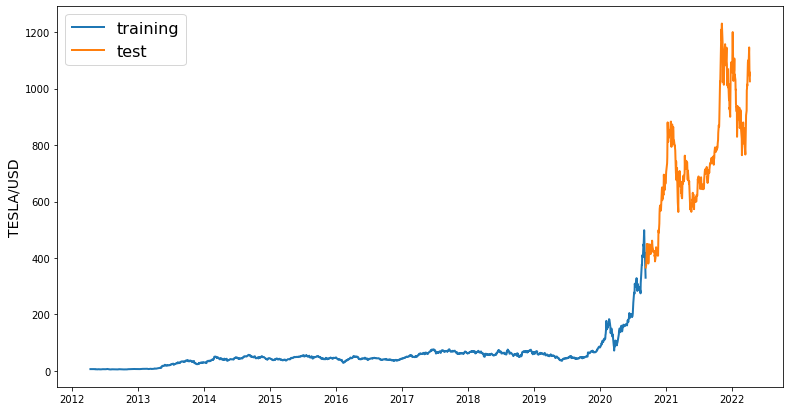

In [138]:
line_plot(y_train[aim], y_test[aim], 'training', 'test', title='')

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [159]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

In [160]:
import numpy as np
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test,axis=1)

In [102]:
X_train.shape

(2117, 1, 4)

In [110]:
from tensorflow.python.keras.layers import SimpleRNNCell
from tensorflow.python.keras.layers import RNN
def build_RNN_model(input_data, output_size, neurons, activ_func='tanh',
                     dropout=0.21, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(RNN(cell=[SimpleRNNCell(256),
                                      SimpleRNNCell(512),
                                      SimpleRNNCell(1024)],input_shape=(1,4)))
    model.add(Dropout(dropout))
    model.add(Dense(units=64*4))
    model.add(Activation("relu"))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model
np.random.seed(1024)
rnn_neurons = 256
epochs = 16
batch_size = 32
loss = 'mse'
dropout = 0.25
optimizer = 'adam'

In [111]:
model = build_RNN_model(
    X_train, output_size=1, neurons=rnn_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
modelfit = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/16
67/67 [==============================] - 2s 8ms/step - loss: 0.0022 - val_loss: 0.0068
Epoch 2/16
67/67 [==============================] - 0s 5ms/step - loss: 5.4535e-04 - val_loss: 0.0070
Epoch 3/16
67/67 [==============================] - 0s 5ms/step - loss: 4.8849e-04 - val_loss: 0.0037
Epoch 4/16
67/67 [==============================] - 0s 5ms/step - loss: 5.5823e-04 - val_loss: 0.0052
Epoch 5/16
67/67 [==============================] - 0s 5ms/step - loss: 4.0428e-04 - val_loss: 0.0019
Epoch 6/16
67/67 [==============================] - 0s 5ms/step - loss: 4.2717e-04 - val_loss: 0.0029
Epoch 7/16
67/67 [==============================] - 0s 5ms/step - loss: 4.2019e-04 - val_loss: 0.0021
Epoch 8/16
67/67 [==============================] - 0s 5ms/step - loss: 3.9087e-04 - val_loss: 0.0037
Epoch 9/16
67/67 [==============================] - 0s 5ms/step - loss: 3.0217e-04 - val_loss: 0.0019
Epoch 10/16
67/67 [==============================] - 0s 5ms/step - loss: 3.6074e-04 - 

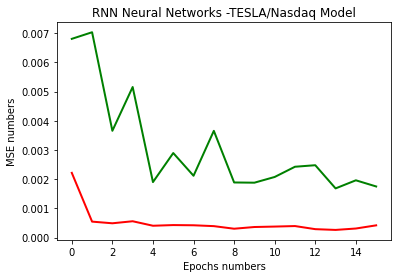

In [139]:
import matplotlib.pyplot as plt
plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('RNN Neural Networks -TESLA/Nasdaq Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.show()

In [113]:
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

0.0325847058254806

In [114]:
from sklearn.metrics import mean_squared_error
SCORE_MSE=mean_squared_error(preds, y_test)
SCORE_MSE

0.001749750789686177

In [115]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, preds)
r2_score*100

96.79341164884251

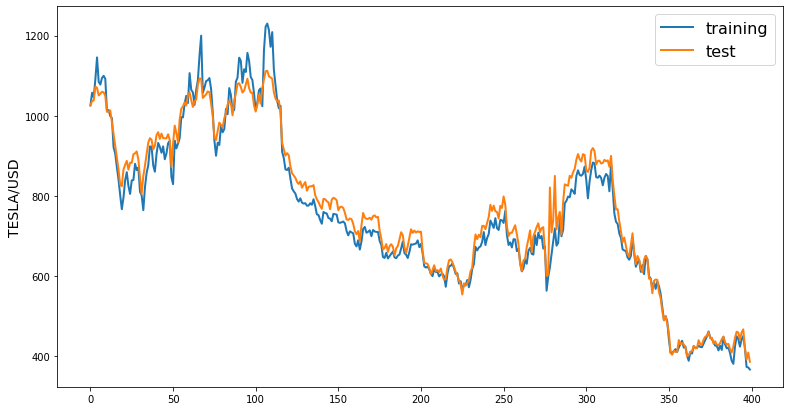

In [161]:
y_testt = scaler.inverse_transform(y_test)
predd = scaler.inverse_transform(preds.reshape(400,1))
line_plot(y_testt, predd, 'training', 'test', title='')

In [128]:
prediction = np.array([18337900,1043.21,1048.44,1022.44]).reshape(1,4)
prediction = np.expand_dims(prediction, axis=0)

In [129]:
prediction = model.predict(prediction)
prediction[0][0]

0.798371

In [130]:
prediction = scaler.inverse_transform(prediction)
prediction[0][0]

1055.7771

In [134]:
real = 1025.49
accuracy = (real - (prediction[0][0] - real))/real
print(f"""0.798371 equeals of 1055.7771 USD == Prediction
Real Tesla Nasdaq Value (for 4/8/2022) is 1025.49 USD
Test Accuracy is {accuracy} """)

0.798371 equeals of 1055.7771 USD == Prediction
Real Tesla Nasdaq Value (for 4/8/2022) is 1025.49 USD
Test Accuracy is 0.9704657289594487 
